#### Importation des données nettoyés

In [573]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline 

population="/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 4/DAN-P4-FAO/population_nettoye.csv"
dispo_ali="/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 4/DAN-P4-FAO/dispo_alimentaire_nettoye.csv"
aide_ali="/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 4/DAN-P4-FAO/aide_alimentaire_nettoye.csv"
sous_nutri="/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 4/DAN-P4-FAO/sous_nutrition_nettoye.csv"
liste_cereales="/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 4/DAN-P4-FAO/liste_cereales.csv"


#### Données sur la disponibilité alimentaire dans le monde

In [396]:
df_dispo_ali = pd.read_csv(dispo_ali)
df_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


#### Calcul de la population mondiale en 2017 (sur le fichier, elle est exprimée en millards, je la convertis en millions)

#### Donnée sur la sous-nutrition dans le monde

In [145]:
df_sous_nutri.head(100)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
95,Bahreïn,2017-2019,0.0
96,Bangladesh,2012-2014,21.7
97,Bangladesh,2013-2015,22.4
98,Bangladesh,2014-2016,23.3


## Pour l’année 2017:


### Question 1: La proportion de personnes en état de sous-nutrition: 
Calcul: nombre de personnes en sous nutrition (années 2016-2018) divisé par le nombre de la population mondiale

#### Importation des fichiers population et sous nutrition:

In [227]:
df_population = pd.read_csv(population)
df_population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [228]:
df_sous_nutri = pd.read_csv(sous_nutri)
df_sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [493]:
sous_nutri_2017 = round(df_sous_nutri[df_sous_nutri['Année'] == 2017]['Valeur'].sum()*10**6,0)
print('Le nombre total de personnes en sous nutrition en 2017 est de {:,.0f} personnes'.format(sous_nutri_2017))

Le nombre total de personnes en sous nutrition en 2017 est de 536,700,000 personnes


In [495]:
population_2017 = round(df_population[df_population['Année'] == 2017]['Valeur'].sum()*10**3,0)
print('Le nombre total de la population en 2017 est de {:,.0f} personnes'.format(population_2017))

Le nombre total de la population en 2017 est de 7,548,134,111 personnes


In [496]:
pop_sous_nutri_2017 = sous_nutri_2017/population_2017*100
print('La proportion de personnes en état de sous-nutrition en 2017 est de {:,.2f} %'.format(pop_sous_nutri_2017))

La proportion de personnes en état de sous-nutrition en 2017 est de 7.11 %


**Réponse question 01: Pour la proportion de personnes en état de sous-nutrition, le ratio est de 7.11%**

### Question 2: Le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale
Calcul: nombre total de calorie produite par pays, divisé par le nombre de la population, divisé par 2200 (kl par jour par personne)

In [238]:
df_dispo_ali = pd.read_csv(dispo_ali)
df_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [251]:
df_dispo_pop = pd.merge(df_dispo_ali,df_population[df_population['Année'] == 2017], on = 'Zone', how = 'left')
df_dispo_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017.0,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113


In [252]:
df_dispo_pop['Disponibilité alimentaire (Kcal/jour)'] = df_dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_pop['Valeur']*10**3
df_dispo_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017.0,36296.113,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017.0,36296.113,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296.113,145184452.0


In [297]:
nutrition_correcte = 2200
nombre_theorique = df_dispo_pop['Disponibilité alimentaire (Kcal/jour)'].sum()/nutrition_correcte
print('Le nombre théorique de personnes qui pourraient être nourries en 2017 est de {:,.0f}, sur une base de 2200 Kcal par jour.'.format(nombre_theorique))

Le nombre théorique de personnes qui pourraient être nourries en 2017 est de 9,508,629,376, sur une base de 2200 Kcal par jour.


**Réponse question 2: On peut théoriquement nourrir 9,508,629,376 de personnes**

### Question 3: (Le nombre théorique de personnes qui pourraient être nourries) Idem pour la disponibilité alimentaire des produits végétaux 


In [298]:
nutrition_correcte = 2200
nombre_theorique = df_dispo_pop[df_dispo_pop['Origine'] == 'vegetale']['Disponibilité alimentaire (Kcal/jour)'].sum()/nutrition_correcte
print('Le nombre théorique de personnes qui pourraient être nourries disponibilité alimentaire des produits végétaux en 2017 est de {:,.0f}, sur une base de 2200 Kcal par jour.'.format(nombre_theorique))

Le nombre théorique de personnes qui pourraient être nourries disponibilité alimentaire des produits végétaux en 2017 est de 7,845,801,914, sur une base de 2200 Kcal par jour.


**Résponse question 3: On peut théoriquement nourrir 7,845,801,914 personnes avec la disponibilité alimentaire des produits végétaux**

### Question 4: L’utilisation de la disponibilité intérieure (correspond à la disponibilité totale d’un aliment au sein du pays.), en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 
Logique de calcul 1: importation + production + variation de stock - exportation - dispo intérieure 

Logique de calcul 2: norriture + pertes + semences + aliment pour animaux + Autres utilisations - dispo intérieure 

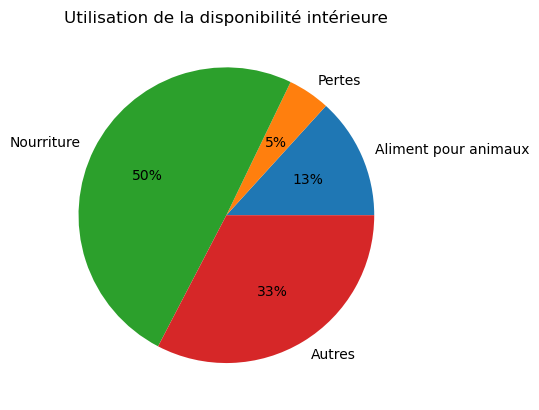

In [392]:
aliment_animaux = df_dispo_pop['Aliments pour animaux'].sum()
perte = df_dispo_pop['Pertes'].sum()
nourriture = df_dispo_pop['Nourriture'].sum()
total = df_dispo_pop['Disponibilité intérieure'].sum()
autres = total - aliment_animaux - perte - nourriture
values=[aliment_animaux,perte,nourriture,autres]
labels=['Aliment pour animaux','Pertes','Nourriture','Autres']
plt.pie(values, labels=labels,autopct='%1.0f%%')
plt.title('Utilisation de la disponibilité intérieure')
plt.show()

**Réponse question 4: L’utilisation de la disponibilité intérieure est de: 13% pour l’alimentation animale, 5% pour celle qui est perdue, 50% pour celle qui est concrètement utilisée pour l'alimentation humaine et 33% pour d'autres utilisations**

### Partie II - Réponse à la demande de Mélanie - Étude un peu plus fine pour chacun des pays.


### 1) Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [506]:
df_sous_nutri_population = pd.merge(df_sous_nutri[df_sous_nutri['Année'] == 2017],df_population[df_population['Année'] == 2017], on = 'Zone', how = 'left')
df_sous_nutri_population = df_sous_nutri_population.rename(columns = {'Valeur_x' : 'Sous_nutri en Million','Valeur_y' : 'Population en Millier'})
df_sous_nutri_population.set_index('Zone',inplace = True)
df_sous_nutri_population.head()

,Année_x,Sous_nutri en Million,Année_y,Population en Millier
Zone,,,,
Afghanistan,2017,10.5,2017,36296.113
Afrique du Sud,2017,3.1,2017,57009.756
Albanie,2017,0.1,2017,2884.169
Algérie,2017,1.3,2017,41389.189
Allemagne,2017,0.0,2017,82658.409


In [507]:
df_sous_nutri_population['Proportion'] =round(df_sous_nutri_population['Sous_nutri en Million']/df_sous_nutri_population['Population en Millier']*10**5,2)
df_sous_nutri_population.sort_values('Proportion',ascending = False,inplace = True)
df_sous_nutri_population[['Proportion']].head(10)

,Proportion
Zone,
Dominique,69.97
Haïti,48.26
République populaire démocratique de Corée,47.19
Saint-Vincent-et-les Grenadines,45.53
Kiribati,43.80
Madagascar,41.06
Libéria,38.28
Lesotho,38.25
Tchad,37.96


**Réponse question 1) Ci-dessus la liste en ordre décroissant des 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017**

### 2) Les pays qui ont le plus bénéficié d’aide depuis 2013

In [508]:
df_aide_ali = pd.read_csv(aide_ali)
df_aide_ali.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [509]:
df_aide_ali_par_pays = df_aide_ali.groupby(by=['Zone'])[['Valeur']].sum()
df_aide_ali_par_pays.sort_values(by='Valeur',ascending = False,inplace = True)
df_aide_ali_par_pays.head(10)

,Valeur
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


**Réponse question 2) Ci-dessus la liste en ordre décroissant des 10 pays qui ont le plus bénéficié d’aide depuis 2013**

### 3.1) Les pays ayant le plus de disponibilité/habitant, etc.

In [510]:
df_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [511]:
df_dispo_ali_par_pays = df_dispo_ali.groupby(by=['Zone'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
df_dispo_ali_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending = False,inplace = True)
df_dispo_ali_par_pays.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


**Réponse question 3.1) Ci-dessus la liste en ordre décroissant des 10 pays ayant le plus de disponibilité/habitant, etc.**

### 3.2) Les pays ayant le moins de disponibilité/habitant, etc.

In [512]:
df_dispo_ali_par_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending = True,inplace = True)
df_dispo_ali_par_pays.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


**Réponse question 3.2) Ci-dessus la liste en ordre décroissant des 10 pays ayant le moins de disponibilité/habitant, etc.**

### 4) et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire

In [513]:
df_aide_ali_par_pays = df_aide_ali[df_aide_ali['Année'] == 2016].groupby(by=['Zone'])[['Valeur']].sum()
df_aide_ali_par_pays.sort_values(by='Valeur',ascending = False,inplace = True)
df_aide_ali_par_pays.head(10)

,Valeur
Zone,
Yémen,465574
République arabe syrienne,118558
Niger,92742
Haïti,12462
Algérie,9476
Côte d'Ivoire,8786
Colombie,5466
Honduras,4492
Libye,4414


In [430]:
df_dispo_aide = pd.merge(df_dispo_ali_par_pays,df_aide_ali_par_pays, on = 'Zone', how = 'left')
df_dispo_aide.head()

,Disponibilité alimentaire (Kcal/personne/jour),Valeur
Zone,,
République centrafricaine,1879.0,NaN
Zambie,1924.0,NaN
Madagascar,2056.0,NaN
Afghanistan,2087.0,NaN
Haïti,2089.0,12462.0


In [446]:
df_dispo_aide[(df_dispo_aide['Disponibilité alimentaire (Kcal/personne/jour)']<2200)
              & ((df_dispo_aide['Valeur'].isna())|(df_dispo_aide['Valeur']<10000))]


,Disponibilité alimentaire (Kcal/personne/jour),Valeur
Zone,,
République centrafricaine,1879.0,NaN
Zambie,1924.0,NaN
Madagascar,2056.0,NaN
Afghanistan,2087.0,NaN
République populaire démocratique de Corée,2093.0,2400.0
Tchad,2109.0,2432.0
Zimbabwe,2113.0,NaN
Ouganda,2126.0,NaN
Éthiopie,2129.0,NaN


**Réponse question 4: Les pays qui semblent être le plus en difficulté, au niveau alimentaire sont ceux qui ont moins de disponibilités intérieure (inférieur à 2200Kcal par jour et par personne) et que reçoivent moins d'aide (inférieur à 10000 tones)**

### Notes laissées par Julien:

**Première question de Julien: Des chiffres intéressants sur l’utilisation des céréales,
notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation
pour animaux.**

**Exportation et lecture du ficher Liste des Céreales**
-- Liste de céreales trouvée sur le fichier disponible sur le site de la FAO:

In [574]:
df_liste_cereales = pd.read_csv(liste_cereales)
df_liste_cereales.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - Quantité,S2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5072,Variation de stock,S2511,Blé et produits,2017,2017,Milliers de tonnes,208.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5911,Exportations - Quantité,S2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5301,Disponibilité intérieure,S2511,Blé et produits,2017,2017,Milliers de tonnes,7151.0,I,Valeur imputée


**Vérification de l'écriture des noms des céreales sur la colonne Produit du ficher Disponibilité Alimentaire pour correspondre à celle du fichier Liste des Céreales:**

In [598]:
liste_produits = list(set(df_dispo_pop['Produit']))
liste_produits.sort()
liste_produits

['Abats Comestible',
 'Agrumes, Autres',
 'Alcool, non Comestible',
 'Aliments pour enfants',
 'Ananas',
 'Animaux Aquatiques Autre',
 'Arachides Decortiquees',
 'Avoine',
 'Bananes',
 'Bananes plantains',
 'Beurre, Ghee',
 'Bière',
 'Blé',
 'Boissons Alcooliques',
 'Boissons Fermentés',
 'Café',
 'Cephalopodes',
 'Citrons & Limes',
 'Coco (Incl Coprah)',
 'Crustacés',
 'Crème',
 'Céréales, Autres',
 'Dattes',
 'Edulcorants Autres',
 'Feve de Cacao',
 'Fruits, Autres',
 'Girofles',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Graines de tournesol',
 'Graisses Animales Crue',
 'Haricots',
 'Huil Plantes Oleif Autr',
 'Huile Graines de Coton',
 "Huile d'Arachide",
 "Huile d'Olive",
 'Huile de Coco',
 'Huile de Colza&Moutarde',
 'Huile de Germe de Maïs',
 'Huile de Palme',
 'Huile de Palmistes',
 'Huile de Soja',
 'Huile de Son de Riz',
 'Huile de Sésame',
 'Huile de Tournesol',
 'Huiles de Foie de Poisso',
 'Huiles de Poissons',
 'Ignames',
 'Lait - Excl Beurre',
 'Légumes, Autres',

**Changement des noms des céreales du fichier Liste Céreales**

In [599]:
liste_cereales = list(set(df_liste_cereales['Produit']))
liste_cereales = list(map(lambda x:x.replace(' et produits','') ,liste_cereales))
liste_cereales[2]='Riz (Eq Blanchi)'
liste_cereales

['Orge',
 'Avoine',
 'Riz (Eq Blanchi)',
 'Maïs',
 'Blé',
 'Sorgho',
 'Seigle',
 'Céréales, Autres',
 'Millet']

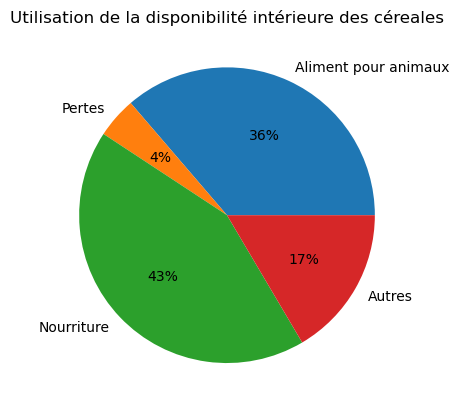

In [659]:
df_cereales = df_dispo_pop.loc[df_dispo_pop['Produit'].isin(liste_cereales),:]
aliment_animaux = df_cereales['Aliments pour animaux'].sum()
perte = df_cereales['Pertes'].sum()
nourriture = df_cereales['Nourriture'].sum()
total = df_cereales['Disponibilité intérieure'].sum()
autres = total - aliment_animaux - perte - nourriture
values=[aliment_animaux,perte,nourriture,autres]
labels=['Aliment pour animaux','Pertes','Nourriture','Autres']
plt.pie(values, labels=labels,autopct='%1.0f%%')
plt.title('Utilisation de la disponibilité intérieure des céreales')
plt.show()

**Deuxième Question de Julien: Un exemple étonnant d’utilisation du manioc par la Thaïlande aux
égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait
l’exportation par rapport à la production:**

In [529]:
df_sous_nutri_population.head()

,Année_x,Sous_nutri en Million,Année_y,Population en Millier,Proportion
Zone,,,,,
Dominique,2017,0.05,2017,71.458,69.97
Haïti,2017,5.30,2017,10982.366,48.26
République populaire démocratique de Corée,2017,12.00,2017,25429.825,47.19
Saint-Vincent-et-les Grenadines,2017,0.05,2017,109.827,45.53
Kiribati,2017,0.05,2017,114.158,43.80


In [624]:
Thailande = df_sous_nutri_population.loc[['Thaïlande'],'Proportion'][0]
print('La proportion de sous nutrition en Thailand est de {:.2f}%'.format(Thailande))

La proportion de sous nutrition en Thailand est de 8.96%


In [626]:
df_dispo_ali.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [627]:
df_Thailande_manioc = df_dispo_ali.loc[(df_dispo_ali['Produit'] == "Manioc") & (df_dispo_ali['Zone'] == "Thaïlande")]
df_Thailande_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [640]:
proportion_exportee = (Thailande_manioc['Exportations - Quantité'].iloc[0]*100 /Thailande_manioc['Production'].iloc[0])
print('La Thailande exporte {:.2f}% de sa production de manioc.'.format(proportion_exportee))


La Thailande exporte 83.41% de sa production de manioc.


In [649]:
df_Thailande = df_dispo_ali.loc[(df_dispo_ali['Zone'] == "Thaïlande")][['Zone','Disponibilité alimentaire (Kcal/personne/jour)', 'Produit']]
dispo_manioc = df_Thailande[df_Thailande['Produit']=='Manioc']['Disponibilité alimentaire (Kcal/personne/jour)'].iloc[0]
dispo_totale = df_Thailande['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_manioc/dispo_totale*100


1.436265709156194

In [650]:
dispo_manioc

40.0

In [655]:
dispo_totale

2785.0

In [653]:
dispo_manioc_sans_exportation = dispo_manioc*100/(100-proportion_exportee)
dispo_manioc_sans_exportation

241.14878340646192

In [657]:
dispo_totale = dispo_totale + dispo_manioc_sans_exportation - dispo_manioc
dispo_totale

3187.297566812924

In [658]:
dispo_manioc_sans_exportation/(dispo_totale)*100

7.5659325290921595